In [5]:
import numpy as np
import pandas as pd 
import Cleversys_Parser as cp
from Useful_Functions import chamber_time
from importlib import reload
cp = reload(cp)


In [31]:
cp = reload(cp)

df, ani_id, fr, date = cp.parse_dev('/media/dprotter/Storage/Cleversys/CleverSys tracking txt files/Baseline_Cohort1/2020_11_23_2wkpaired_baseline_cohort1_try2_4_TCR.TXT') 

{'huddle_left': 'EventRule17', 'huddle_right': 'EventRule22', 'proximity_left': 'EventRule31', 'proximity_right': 'EventRule32', 'left_chamber': 'EventRule4', 'right_chamber': 'EventRule5', 'center_chamber': 'EventRule6'}


In [41]:
print(f'left chamber: {len(df.loc[(df.chamber_novel>0)])}')
print(f'locamotion in left chamber: {len(df.loc[(df.EventRule9>0)])}')
print(f'locamotion in left, "not in left": {len(df.loc[(df.EventRule9>0)&(df.chamber_novel==0)])}')
print(f'locamotion in left, in center: {len(df.loc[(df.EventRule9>0)&(df.chamber_novel==0)&(df.chamber_center>0)])}')


left chamber: 151322
locamotion in left chamber: 6651
locamotion in left, "not in left": 21
locamotion in left, in center: 0


In [42]:
sli = df.loc[(df.chamber_partner >0)&(df.chamber_novel >0)]
print(f'uncertain frames = {len(sli)}')
print(f'huddle_partner frames = {sum(sli.huddle_partner)}')
print(f'huddle_novel frames = {sum(sli.huddle_novel)}')

uncertain frames = 108
huddle_partner frames = 0
huddle_novel frames = 0


In [43]:
huddle_sli = df.loc[df.huddle_partner>0]
print(f'number of huddle_partner frames: {len(huddle_sli)}')
print(f'partner_chamber frames         : {sum(huddle_sli.chamber_partner >0)}')

number of huddle_partner frames: 33976
partner_chamber frames         : 33976


In [44]:
huddle_sli = df.loc[df.huddle_novel>0]
print(f'number of huddle_novel frames: {len(huddle_sli)}')
print(f'partner_chamber frames         : {sum(huddle_sli.chamber_novel >0)}')

number of huddle_novel frames: 8857
partner_chamber frames         : 8857


In [45]:
huddle_sli = df.loc[df.huddle_partner>0]
print(len(huddle_sli) / 29.97)
print(len(df.loc[df.chamber_partner>0]) / 29.97)
print(chamber_time(df, 29.97))

1133.6670003336671
4564.931598264931
(5049.115782449116, 4564.931598264931, 1193.15982649316)


In [37]:
lr = len(df.loc[(df.chamber_partner >0)&(df.chamber_novel >0) & (df.chamber_center == 0)])

lc = len(df.loc[(df.chamber_partner >0)&(df.chamber_novel ==0) & (df.chamber_center > 0)])

rc = len(df.loc[(df.chamber_partner == 0)&(df.chamber_novel >0) & (df.chamber_center > 0)])

lrc = len(df.loc[(df.chamber_partner > 0)&(df.chamber_novel >0) & (df.chamber_center > 0)])

In [38]:
sli = df.loc[(df.chamber_partner >0)&(df.chamber_novel >0) & (df.chamber_center > 0)]

In [39]:
df.loc[(df.chamber_partner > 0)&(df.chamber_novel >0) & (df.chamber_center > 0)]

,FrameNum,[AnimalID],CenterX(mm),CenterY(mm),NoseX(mm),NoseY(mm),Motion Orientation(-pi/2 to pi.2),Unknown,Axis[0](mm),Axis[1](mm),...,EventRule42,original_frames,Time,original_time,Treatment Group,distance_to_partner,distance_to_novel,distance_traveled,distance_traveled_partner,distance_traveled_novel
39400,39401,2968,1474.0,402.0,1469.0,382.0,0.137255,1.754765,27.0,14.0,...,1,40989,1314.681348,1367.667668,baseline,510.813077,153.081678,1.414214,0.000000,0.0
39401,39402,2968,1476.0,398.0,1482.0,378.0,0.250980,1.839285,23.0,12.0,...,1,40990,1314.714715,1367.701034,baseline,509.558633,155.003226,4.472136,0.000000,0.0
39402,39403,2968,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,40991,1314.748081,1367.734401,baseline,NaN,NaN,NaN,1.414214,0.0
39403,39404,2968,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,40992,1314.781448,1367.767768,baseline,NaN,NaN,NaN,0.000000,0.0
39404,39405,2968,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,40993,1314.814815,1367.801134,baseline,NaN,NaN,NaN,0.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169699,169700,2968,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,171288,5662.328996,5715.315315,baseline,NaN,NaN,NaN,0.000000,0.0
169700,169701,2968,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,171289,5662.362362,5715.348682,baseline,NaN,NaN,NaN,0.000000,1.0
169701,169702,2968,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,171290,5662.395729,5715.382049,baseline,NaN,NaN,NaN,0.000000,0.0
169702,169703,2968,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,171291,5662.429096,5715.415415,baseline,NaN,NaN,NaN,0.000000,0.0


In [40]:
#pct of frames where the animal is IDd in multiple chambers. 
(lr+lc+rc+lrc) / len(df)

0.000333667000333667

In [9]:
#pct of frames where the animal pos is unknown
len(df.loc[df['CenterX(mm)'].isna()])/len(df)

0.13879929312028078

In [10]:
#number of frames where the animal is IDd in multiple regions, by region
#almost entirely assigned to all 3 chambers.
print(f' lc:{lc}\n lr:{lr}\n rc:{rc}\nlrc:{lrc}')

 lc:40
 lr:0
 rc:32
lrc:44844


In [11]:
df['CenterX(mm)_partner']

0         1311.0
1         1311.0
2         1311.0
3         1311.0
4         1311.0
           ...  
323671    1307.0
323672    1307.0
323673    1307.0
323674    1307.0
323675    1307.0
Name: CenterX(mm)_partner, Length: 323676, dtype: float64

In [12]:
sli = df.loc[(df.chamber_partner >0)&(df.chamber_novel >0) & (df.chamber_center > 0)]

In [13]:
sli['huddle_novel'].sum()

0

In [14]:
sli['huddle_partner'].sum()

4

In [15]:
sli['partner_dist_less_10cm'].sum()

0

In [16]:
sli['novel_dist_less_10cm'].sum()

0

In [17]:
sli.columns

Index(['FrameNum', '[AnimalID]', 'CenterX(mm)', 'CenterY(mm)', 'NoseX(mm)',
       'NoseY(mm)', 'Motion Orientation(-pi/2 to pi.2)', 'Unknown',
       'Axis[0](mm)', 'Axis[1](mm)', 'TurningAngleSum', 'DistanceSum(mm)',
       '[Center_Areas]', '[Nose_Areas]', '[AnimalID]_partner',
       'CenterX(mm)_partner', 'CenterY(mm)_partner', 'NoseX(mm)_partner',
       'NoseY(mm)_partner', 'Motion Orientation(-pi/2 to pi.2)_partner',
       'Unknown_partner', 'Axis[0](mm)_partner', 'Axis[1](mm)_partner',
       'TurningAngleSum_partner', 'DistanceSum(mm)_partner',
       '[Center_Areas]_partner', '[Nose_Areas]_partner', '[AnimalID]_novel',
       'CenterX(mm)_novel', 'CenterY(mm)_novel', 'NoseX(mm)_novel',
       'NoseY(mm)_novel', 'Motion Orientation(-pi/2 to pi.2)_novel',
       'Unknown_novel', 'Axis[0](mm)_novel', 'Axis[1](mm)_novel',
       'TurningAngleSum_novel', 'DistanceSum(mm)_novel',
       '[Center_Areas]_novel', '[Nose_Areas]_novel', 'EventRule1',
       'EventRule2', 'EventRule3',

In [18]:

indices = df.loc[(df.chamber_partner >0)&(df.chamber_novel >0) & (df.chamber_center > 0)].index

In [19]:
indices

Int64Index([ 12895,  12896,  12897,  12898,  12899,  12900,  12901,  12902,
             12903,  12904,
            ...
            314355, 314356, 314357, 314358, 314359, 314360, 314361, 314362,
            314363, 314364],
           dtype='int64', length=44844)

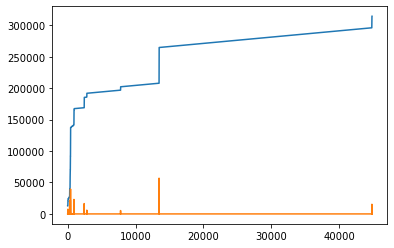

In [20]:
import matplotlib.pyplot as plt
plt.plot(indices)
diff = indices[1:] - indices[:-1]
new = [1 if val == 1 else 0 for val in diff]
plt.plot(diff)

In [21]:
def get_index_pairs(index_list):
    diff = index_list[1:] - index_list[:-1]
    new = np.asarray([True if val == 1 else False for val in diff])
    new = np.logical_not(new)
    if not new[-1]:
        new[-1] = True
    transition_indices = np.where(new)[0]

    sets = []
    prev = 0
    for val in transition_indices:
        try:
            sets += [index_list[prev:val+1]]
            prev = val+1
        except:
            print(f'prev:{prev}, val:{val}')

    pairs = []
    for i, s in enumerate(sets):
        if len(s) > 1:
            pairs += [[s[0], s[-1]]]
        elif len(s) == 1:
            pairs += [[s[0], s[0]]]
        else:
            print('oops')
            print(s)
            
    return np.asarray(pairs)


In [22]:
def get_index_pairs_v2(index_list):

    #offset the index list by 1 and take the difference
    diff = index_list[1:] - index_list[:-1]

    #where the difference is 1 the indices are sequential. Label nonsequential True
    new = np.asarray([False if val == 1 else True for val in diff])

        
    #get the location of the transition indices
    transition_indices = np.where(new)[0]

    sets = []
    pairs = []

    prev = 0
    
    for val in transition_indices:
        
        try:
            
                    
            #list s of sequential indeces, starting at location 0 (first index in 
            # index_list )
            s = index_list[prev:val+1]
            
            #add the list s to sets. not using this at the moment, but could be
            #useful down the line
            sets += [s]
            
            #update prev for the next loop
            prev = val+1

            if len(s) > 1:
                #if the list s has more than one value take the first and last
                pairs += [[s[0], s[-1]]]
            elif len(s) == 1:
                #if the s has just one value, it is both the 'start' and 'stop' of 
                # a sequence

                pairs += [[s[0], s[0]]]
            else:
                #we shouldnt ever get here. an empty list.
                print('oops')
                print(s)
        except:
            print(f'prev:{prev}, val:{val}')
        
    if new[-1]:
        sets += [[index_list[-1]]]
        pairs += [[index_list[-1] , index_list[-1]]]
    else:
        sets += [[index_list[prev:]]]
        pairs += [[index_list[prev], index_list[-1]]]
    return np.asarray(pairs)


def get_previous_location(df, search_start_index, current_loc = None, window = 3,
                            max_distance = 10):

        ############dont forget  we need to give julie the times she needs to 
        # use to look at the videos

        #double check if 
    start = search_start_index-1 if not current_loc else current_loc
    current_loc = current_loc if current_loc else start
    
    sli = df.iloc[start-window:start]
    sli = sli.loc[:,'chamber_partner':'chamber_novel']
    
    #check if the sum of all the 1's is greater than the window length, which would mean 
    #that there is at least once place where the animal is listed in both chambers
    if np.sum(sli.values) > window:
        #we've encountered a place where there was a multi-assignment
        if np.abs(current_loc-search_start_index) < max_distance:
            #if we havent gone to far, try taking another step back in time
            return get_previous_location(df,            
                                    search_start_index, current_loc = current_loc - 1, 
                                    window = window, 
                                    max_distance = max_distance)
        else:
            return -1, 'failed'
    
    else:
        #return the index the reassignment is taken from, and the column to 
        #set to 1 (True)
        return current_loc, sli.sum().idxmax()




In [23]:

indices = np.asarray([3,4,5,9,10,11,12,15,18,19,20,24])

diff = indices[1:] - indices[:-1]
new = np.asarray([True if val == 1 else False for val in diff])
new = np.logical_not(new)
transition_indices = np.where(new)[0]

In [24]:
transition_indices

array([ 2,  6,  7, 10])

In [25]:
prev = 0
sets = []
for val in transition_indices:
    sets+=[indices[prev:val+1]]
    prev = val+1


In [26]:
ind = df.loc[(df.chamber_partner >0)&(df.chamber_novel >0) & (df.chamber_center > 0)].index

pairs = get_index_pairs_v2(ind)

In [27]:
for start, finish in pairs:




    sli = df.iloc[start-3:start]
    sli = sli.loc[:,'chamber_partner':'chamber_center']
    print(np.sum(sli, axis = 0))
    if np.sum(sli.loc[:,'chamber_partner':'chamber_center'].values) > 3:
        print(sli.loc[:,'chamber_partner':'chamber_center'])
    
    print('\n')

chamber_partner    0
chamber_novel      3
chamber_center     0
dtype: int64


chamber_partner    3
chamber_novel      0
chamber_center     0
dtype: int64


chamber_partner    0
chamber_novel      3
chamber_center     0
dtype: int64


chamber_partner    0
chamber_novel      3
chamber_center     0
dtype: int64


chamber_partner    3
chamber_novel      0
chamber_center     1
dtype: int64
       chamber_partner  chamber_novel  chamber_center
26469                1              0               0
26470                1              0               0
26471                1              0               1


chamber_partner    3
chamber_novel      0
chamber_center     0
dtype: int64


chamber_partner    3
chamber_novel      0
chamber_center     0
dtype: int64


chamber_partner    3
chamber_novel      0
chamber_center     0
dtype: int64


chamber_partner    0
chamber_novel      3
chamber_center     0
dtype: int64


chamber_partner    0
chamber_novel      3
chamber_center     0
dtype: int64


cham

In [45]:
new_df = df.copy()
new_df['modified_due_to_uncertainty'] = 0
for start, finish in pairs:
    loc, col = get_previous_location(df, search_start_index=start, window = 3)
    st = df.iloc[start]["original_time"]
    ft = df.iloc[finish]["original_time"]
    print(f'time_start: {st:.2f} time_end: {ft:.2f} reassigned_to: {col}       index_start: {start} index_finish: {finish} distance: {start-loc}')
    
    
    all_cols = ['chamber_partner', 'chamber_novel', 'chamber_center']
    for ac in all_cols:
        if ac != col:
            
            new_df.loc[(new_df.index >= start) & (new_df.index <= finish), ac] = 0
            new_df.loc[(new_df.index >= start) & (new_df.index <= finish), 'modified_due_to_uncertainty'] = 1

time_start: 479.28 time_end: 480.15 reassigned_to: chamber_novel       index_start: 12895 index_finish: 12921 distance: 1
time_start: 728.26 time_end: 729.06 reassigned_to: chamber_partner       index_start: 20357 index_finish: 20381 distance: 1
time_start: 858.99 time_end: 859.33 reassigned_to: chamber_novel       index_start: 24275 index_finish: 24285 distance: 1
time_start: 862.46 time_end: 866.50 reassigned_to: chamber_novel       index_start: 24379 index_finish: 24500 distance: 1
time_start: 932.30 time_end: 935.74 reassigned_to: chamber_partner       index_start: 26472 index_finish: 26575 distance: 1
time_start: 1362.00 time_end: 1362.93 reassigned_to: chamber_partner       index_start: 39350 index_finish: 39378 distance: 1
time_start: 1394.19 time_end: 1394.83 reassigned_to: chamber_partner       index_start: 40315 index_finish: 40334 distance: 1
time_start: 1398.67 time_end: 1399.03 reassigned_to: chamber_partner       index_start: 40449 index_finish: 40460 distance: 1
time_sta

In [29]:
ind = df.loc[(df.chamber_partner >0)&(df.chamber_novel >0) & (df.chamber_center == 0)].index

In [30]:
df.original_time

0            49.015682
1            49.049049
2            49.082416
3            49.115782
4            49.149149
              ...     
323671    10848.848849
323672    10848.882216
323673    10848.915582
323674    10848.948949
323675    10848.982316
Name: original_time, Length: 323676, dtype: float64

In [31]:
np.sum(chamber_time(df, 29.97)) 

13794.561227894563

In [43]:
np.sum(chamber_time(new_df, 29.97))

10801.96863530197

In [33]:
ind = new_df.loc[(new_df.chamber_partner >0)&(new_df.chamber_novel >0) ].index

In [34]:
len(new_df.loc[new_df.chamber_partner >0]) + len(new_df.loc[new_df.chamber_novel >0])+ len(new_df.loc[new_df.chamber_center >0])

323735

In [35]:
len(new_df.loc[(df.chamber_partner >0)&(new_df.chamber_novel >0) & (new_df.chamber_center > 0)])

0

In [36]:
new_df.loc[(df.chamber_partner >0)&(new_df.chamber_novel >0) & (new_df.chamber_center > 0), 
           'chamber_partner':'chamber_center']

,chamber_partner,chamber_novel,chamber_center


In [37]:
len(new_df)

323676

In [38]:
chamber_time(new_df, 29.97)

(2366.666666666667, 7445.912579245913, 989.3893893893894)

In [39]:
new_df.loc[(new_df.index >= start) & (new_df.index <= finish), col]

314354    1
314355    1
314356    1
314357    1
314358    1
314359    1
314360    1
314361    1
314362    1
314363    1
314364    1
Name: chamber_partner, dtype: int64

In [40]:
pairs

array([[ 12895,  12921],
       [ 20357,  20381],
       [ 24275,  24285],
       [ 24379,  24500],
       [ 26472,  26575],
       [ 39350,  39378],
       [ 40315,  40334],
       [ 40449,  40460],
       [ 59083,  59099],
       [ 69539,  69562],
       [ 91517,  91524],
       [ 91596,  91611],
       [ 97866,  97873],
       [137383, 137408],
       [137580, 137628],
       [137694, 137715],
       [138175, 138201],
       [138552, 138564],
       [138582, 138621],
       [138773, 138782],
       [139167, 139180],
       [139317, 139355],
       [139591, 139652],
       [140003, 140010],
       [140077, 140142],
       [140442, 140474],
       [140689, 140718],
       [141884, 141902],
       [141945, 141964],
       [141982, 142003],
       [165014, 165039],
       [167410, 168896],
       [185336, 185674],
       [185866, 185908],
       [191857, 196831],
       [202174, 207846],
       [264649, 295992],
       [298697, 298709],
       [314035, 314044],
       [314354, 314364]])

In [41]:
index_list = df.loc[(df.chamber_partner >0)&(df.chamber_novel >0) & (df.chamber_center > 0)].index
diff = index_list[1:] - index_list[:-1]

In [42]:
get_index_pairs_v2(index_list)

array([[ 12895,  12921],
       [ 20357,  20381],
       [ 24275,  24285],
       [ 24379,  24500],
       [ 26472,  26575],
       [ 39350,  39378],
       [ 40315,  40334],
       [ 40449,  40460],
       [ 59083,  59099],
       [ 69539,  69562],
       [ 91517,  91524],
       [ 91596,  91611],
       [ 97866,  97873],
       [137383, 137408],
       [137580, 137628],
       [137694, 137715],
       [138175, 138201],
       [138552, 138564],
       [138582, 138621],
       [138773, 138782],
       [139167, 139180],
       [139317, 139355],
       [139591, 139652],
       [140003, 140010],
       [140077, 140142],
       [140442, 140474],
       [140689, 140718],
       [141884, 141902],
       [141945, 141964],
       [141982, 142003],
       [165014, 165039],
       [167410, 168896],
       [185336, 185674],
       [185866, 185908],
       [191857, 196831],
       [202174, 207846],
       [264649, 295992],
       [298697, 298709],
       [314035, 314044],
       [314354, 314364]])

In [48]:
cp = reload(cp)

In [49]:
df_out, ani, fr, date, change_log = cp.parse_dev('/media/dprotter/Storage/Cleversys/CleverSys tracking txt files/Baseline_Cohort1/2020_11_23_2wkpaired_baseline_cohort1_try2_3_TCR.TXT')

In [55]:
sli = df_out.loc[df_out.modified_due_to_uncertainty >0]

In [56]:
sli.loc[sli['CenterX(mm)'].notna()]

,FrameNum,[AnimalID],CenterX(mm),CenterY(mm),NoseX(mm),NoseY(mm),Motion Orientation(-pi/2 to pi.2),Unknown,Axis[0](mm),Axis[1](mm),...,Time,original_time,Treatment Group,distance_to_partner,distance_to_novel,distance_traveled,distance_traveled_partner,distance_traveled_novel,modified_due_to_uncertainty,reassigned_to
12895,12896,3064,1860.0,315.0,1854.0,296.0,0.152941,1.848179,24.0,14.0,...,430.296964,479.279279,baseline,538.092929,176.638048,2.236068,0.0,0.0,1,chamber_novel
12896,12897,3064,1860.0,314.0,1857.0,293.0,0.117647,1.795059,26.0,13.0,...,430.330330,479.312646,baseline,538.112442,176.725776,1.000000,0.0,0.0,1,chamber_novel
20357,20358,3064,1483.0,311.0,1491.0,296.0,0.129412,1.231933,16.0,15.0,...,679.279279,728.261595,baseline,172.165618,549.263143,1.414214,0.0,0.0,1,chamber_partner
20358,20359,3064,1484.0,311.0,1491.0,296.0,0.062745,1.334976,19.0,16.0,...,679.312646,728.294962,baseline,173.158887,548.263623,1.000000,0.0,0.0,1,chamber_partner
20371,20372,3064,1483.0,312.0,1495.0,296.0,0.062745,0.863531,17.0,13.0,...,679.746413,728.728729,baseline,172.052318,549.233102,NaN,0.0,0.0,1,chamber_partner
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314036,314037,3064,1498.0,224.0,1504.0,207.0,0.200000,1.289361,22.0,13.0,...,10478.378378,10527.360694,baseline,213.321354,513.272832,4.123106,0.0,0.0,1,chamber_partner
314041,314042,3064,1505.0,234.0,1495.0,258.0,0.200000,-2.248073,22.0,13.0,...,10478.545212,10527.527528,baseline,215.870331,505.866583,NaN,0.0,0.0,1,chamber_partner
314042,314043,3064,1503.0,240.0,1491.0,264.0,0.333333,-2.447321,27.0,13.0,...,10478.578579,10527.560894,baseline,211.697898,507.055224,6.324555,0.0,0.0,1,chamber_partner
314354,314355,3064,1482.0,313.0,1479.0,296.0,0.196078,1.445447,24.0,15.0,...,10488.988989,10537.971305,baseline,173.002890,520.096145,2.828427,0.0,0.0,1,chamber_partner


In [59]:
cp = reload(cp)
out = cp.parse('/media/dprotter/Storage/Cleversys/CleverSys tracking txt files/Baseline_Cohort1/2020_11_23_2wkpaired_baseline_cohort1_try2_2_TCR.TXT')

In [61]:
out[0].columns

Index(['FrameNum', '[AnimalID]', 'CenterX(mm)', 'CenterY(mm)', 'NoseX(mm)',
       'NoseY(mm)', 'Motion Orientation(-pi/2 to pi.2)', 'Unknown',
       'Axis[0](mm)', 'Axis[1](mm)', 'TurningAngleSum', 'DistanceSum(mm)',
       '[Center_Areas]', '[Nose_Areas]', '[AnimalID]_novel',
       'CenterX(mm)_novel', 'CenterY(mm)_novel', 'NoseX(mm)_novel',
       'NoseY(mm)_novel', 'Motion Orientation(-pi/2 to pi.2)_novel',
       'Unknown_novel', 'Axis[0](mm)_novel', 'Axis[1](mm)_novel',
       'TurningAngleSum_novel', 'DistanceSum(mm)_novel',
       '[Center_Areas]_novel', '[Nose_Areas]_novel', '[AnimalID]_partner',
       'CenterX(mm)_partner', 'CenterY(mm)_partner', 'NoseX(mm)_partner',
       'NoseY(mm)_partner', 'Motion Orientation(-pi/2 to pi.2)_partner',
       'Unknown_partner', 'Axis[0](mm)_partner', 'Axis[1](mm)_partner',
       'TurningAngleSum_partner', 'DistanceSum(mm)_partner',
       '[Center_Areas]_partner', '[Nose_Areas]_partner', 'EventRule1',
       'EventRule2', 'EventRule3',